In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Problem statement
Identify the key health parameters that influence the presence of cardiovascular disease in individuals.

# Hypothesis
We hypothesize that age, blood pressure (both systolic and diastolic), and cholesterol levels are the most significant factors in determining the presence of cardiovascular disease.

In [3]:
# Load the dataset
data = pd.read_csv('/Users/13074/Desktop/cardio_train.csv', sep=';')

# Check the shape of the dataset
print('Shape of the dataset:', data.shape)

# Check for missing values
print('\nMissing values in the dataset:')
print(data.isnull().sum())

Shape of the dataset: (70000, 13)

Missing values in the dataset:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


The dataset contains 70,000 observations and 13 features. Here are some insights from the initial exploration: There are no missing values in the dataset

id: Patient identification number

age: Patient's age in days

gender: Patient's gender, 1 woman, 2 men

height: Patient's height in cm

weight: Patient's weight in kg

ap_hi: Systolic blood pressure

ap_lo: Diastolic blood pressure

cholesterol: Cholesterol level (1: normal, 2: above normal, 3: well above normal)

gluc: Glucose level (1: normal, 2: above normal, 3: well above normal)

smoke: Binary feature (0: doesn't smoke, 1: smokes)

alco: Binary feature (0: doesn't drink alcohol, 1: drinks alcohol)

active: Binary feature (0: not physically active, 1: physically active)

cardio: Presence or absence of cardiovascular disease (0: disease not present, 1: disease present)

Numerical variables: age, height, weight, ap_hi, ap_lo.

Categorical variables: gender, cholesterol, gluc, smoke, alco, active, cardio.

In [4]:
# Get summary statistics for numerical variables
print('\nSummary statistics for numerical variables:')
print(data.describe())


Summary statistics for numerical variables:
                 id           age        gender        height        weight   
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000  \
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke   
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000  \
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std   

# The descriptive statistics for the numerical variables are as follows:

age: The average age is around 19468 days (which is roughly 53 years). The youngest person in the dataset is around 10798 days old (about 30 years), while the oldest is around 23713 days old (about 65 years).

height: The average height is approximately 164.36 cm. The shortest individual is 55 cm and the tallest is 250 cm. There might be some data entry errors as it's unlikely for an adult to be 55 cm tall.

weight: The average weight is about 74.21 kg. The lightest individual weighs 10 kg (which is likely a data entry error) and the heaviest weighs 200 kg.

ap_hi (Systolic blood pressure): The average is around 128.82. However, there are some suspicious values such as -150 and 16020 which are likely due to data entry errors.

ap_lo (Diastolic blood pressure): The average is around 96.63. Similar to ap_hi, there are some suspicious values such as -70 and 11000 which are likely due to data entry errors.

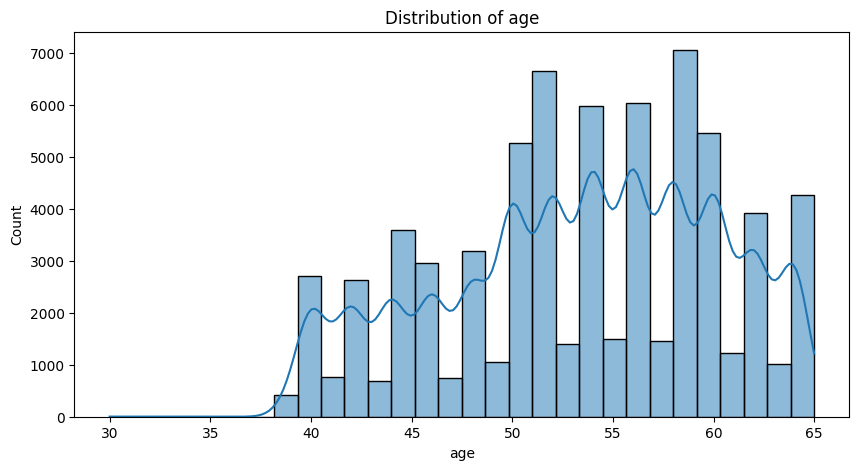

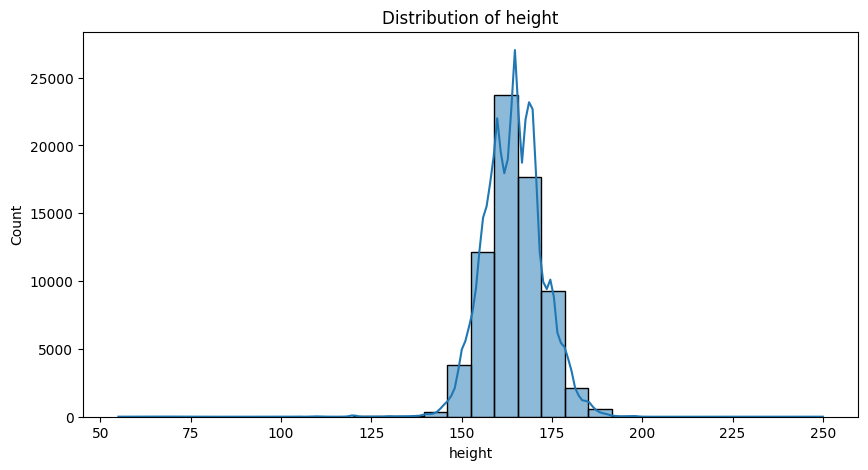

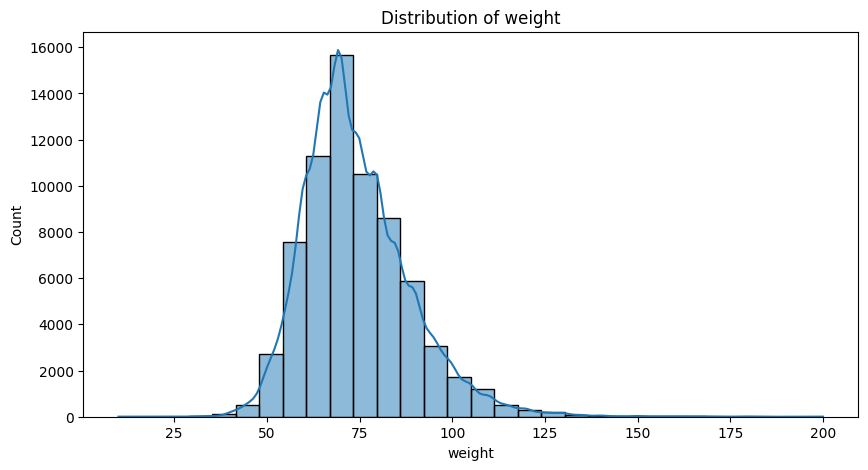

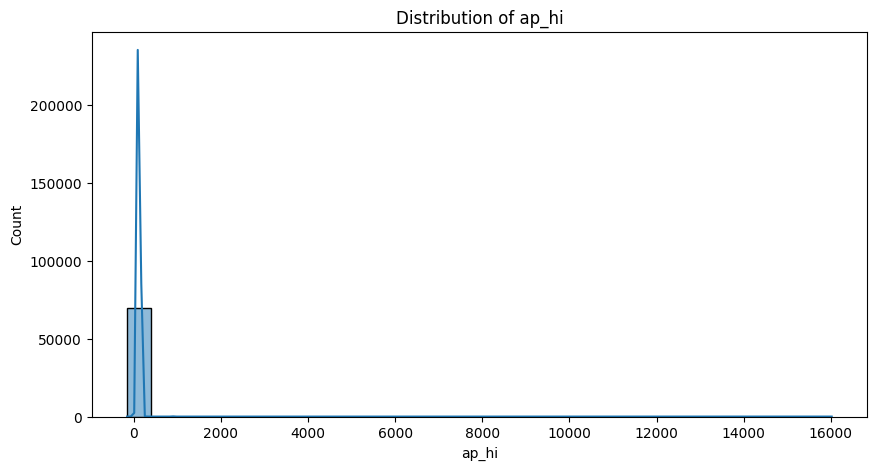

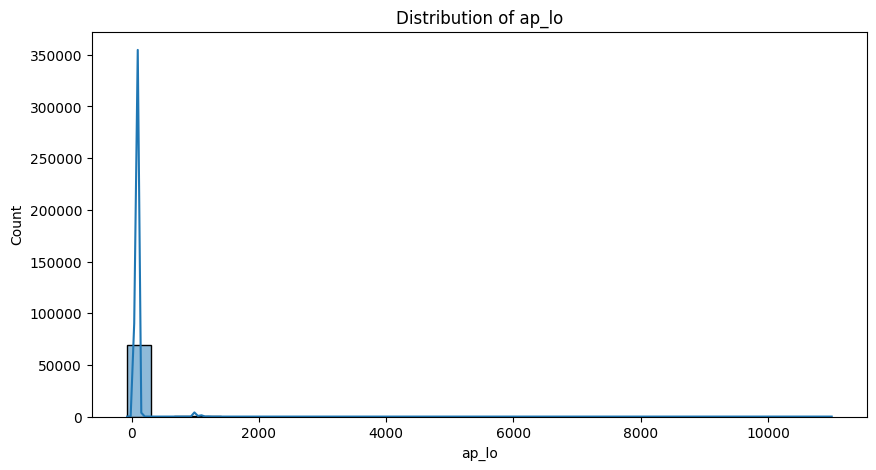

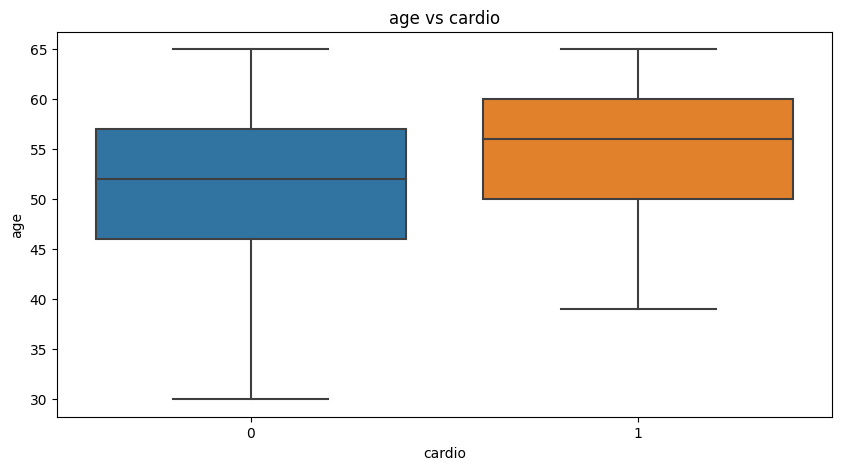

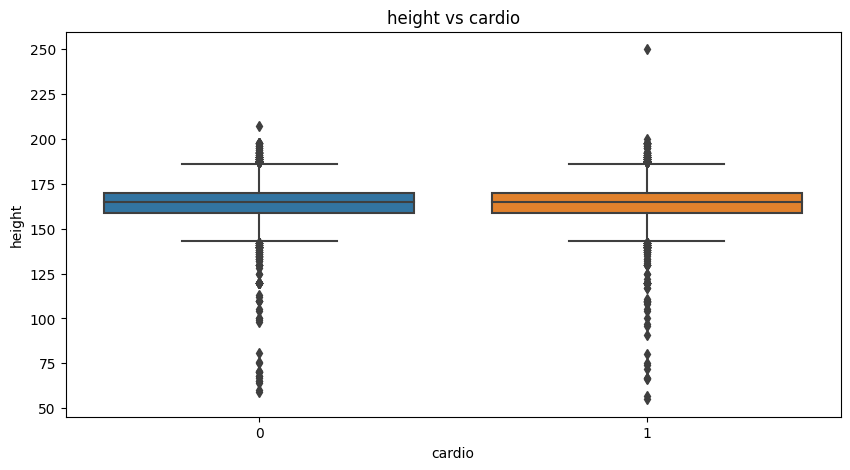

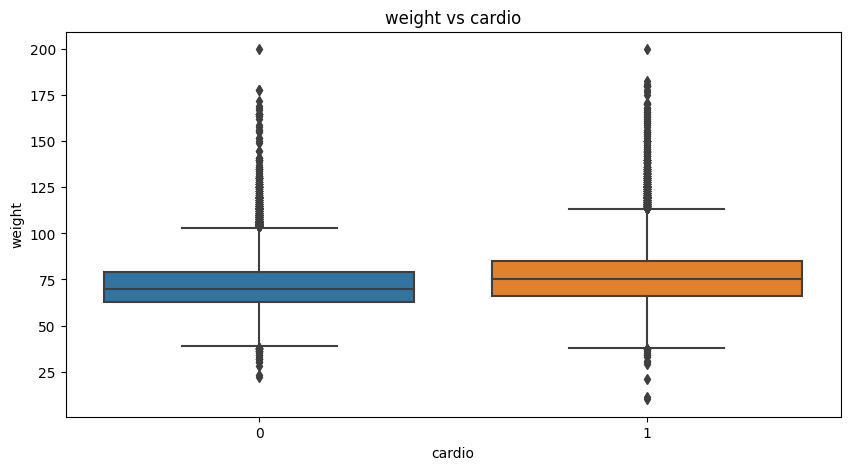

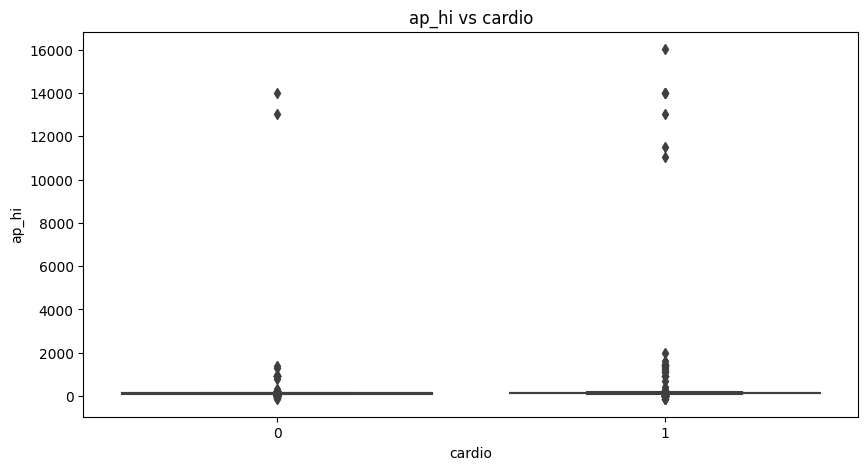

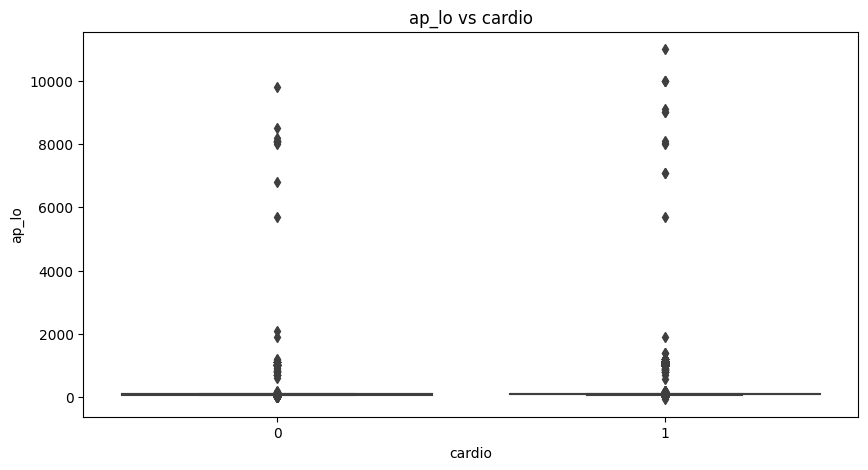

In [5]:
# Convert age from days around to years 
data['age'] = (data['age'] / 365) .round().astype('int')

# List of numerical columns
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plot histograms for numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Plot boxplots of numerical columns against the target variable
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='cardio', y=col, data=data)
    plt.title(f'{col} vs cardio')
    plt.show()

## Orignial Data Analysis - numerical variables

Age: The distribution is slightly left-skewed. Most of the patients are in the age range of 40 to 65 years. The age of individuals with cardiovascular disease (cardio=1) is generally higher than those without the disease (cardio=0). 

Height: The distribution is roughly normal, with most heights ranging between 150 and 180 cm. There are some values at the lower end that could be considered outliers.  The median height is slightly lower for individuals with cardiovascular disease (cardio=1) compared to those without the disease (cardio=0). 

Weight: The distribution is slightly right-skewed, with most weights ranging between 50 and 100 kg.  
Individuals with cardiovascular disease (cardio=1) tend to have higher weight than those without the disease (cardio=0). 

ap_hi and ap_lo: These distributions are heavily affected by outliers, and it's hard to make out the true distributions.

Individuals with cardiovascular disease (cardio=1) tend to have higher systolic blood pressure (ap_hi) than those without the disease (cardio=0). 
Individuals with cardiovascular disease (cardio=1) tend to have higher diastolic blood pressure (ap_lo) than those without the disease (cardio=0).

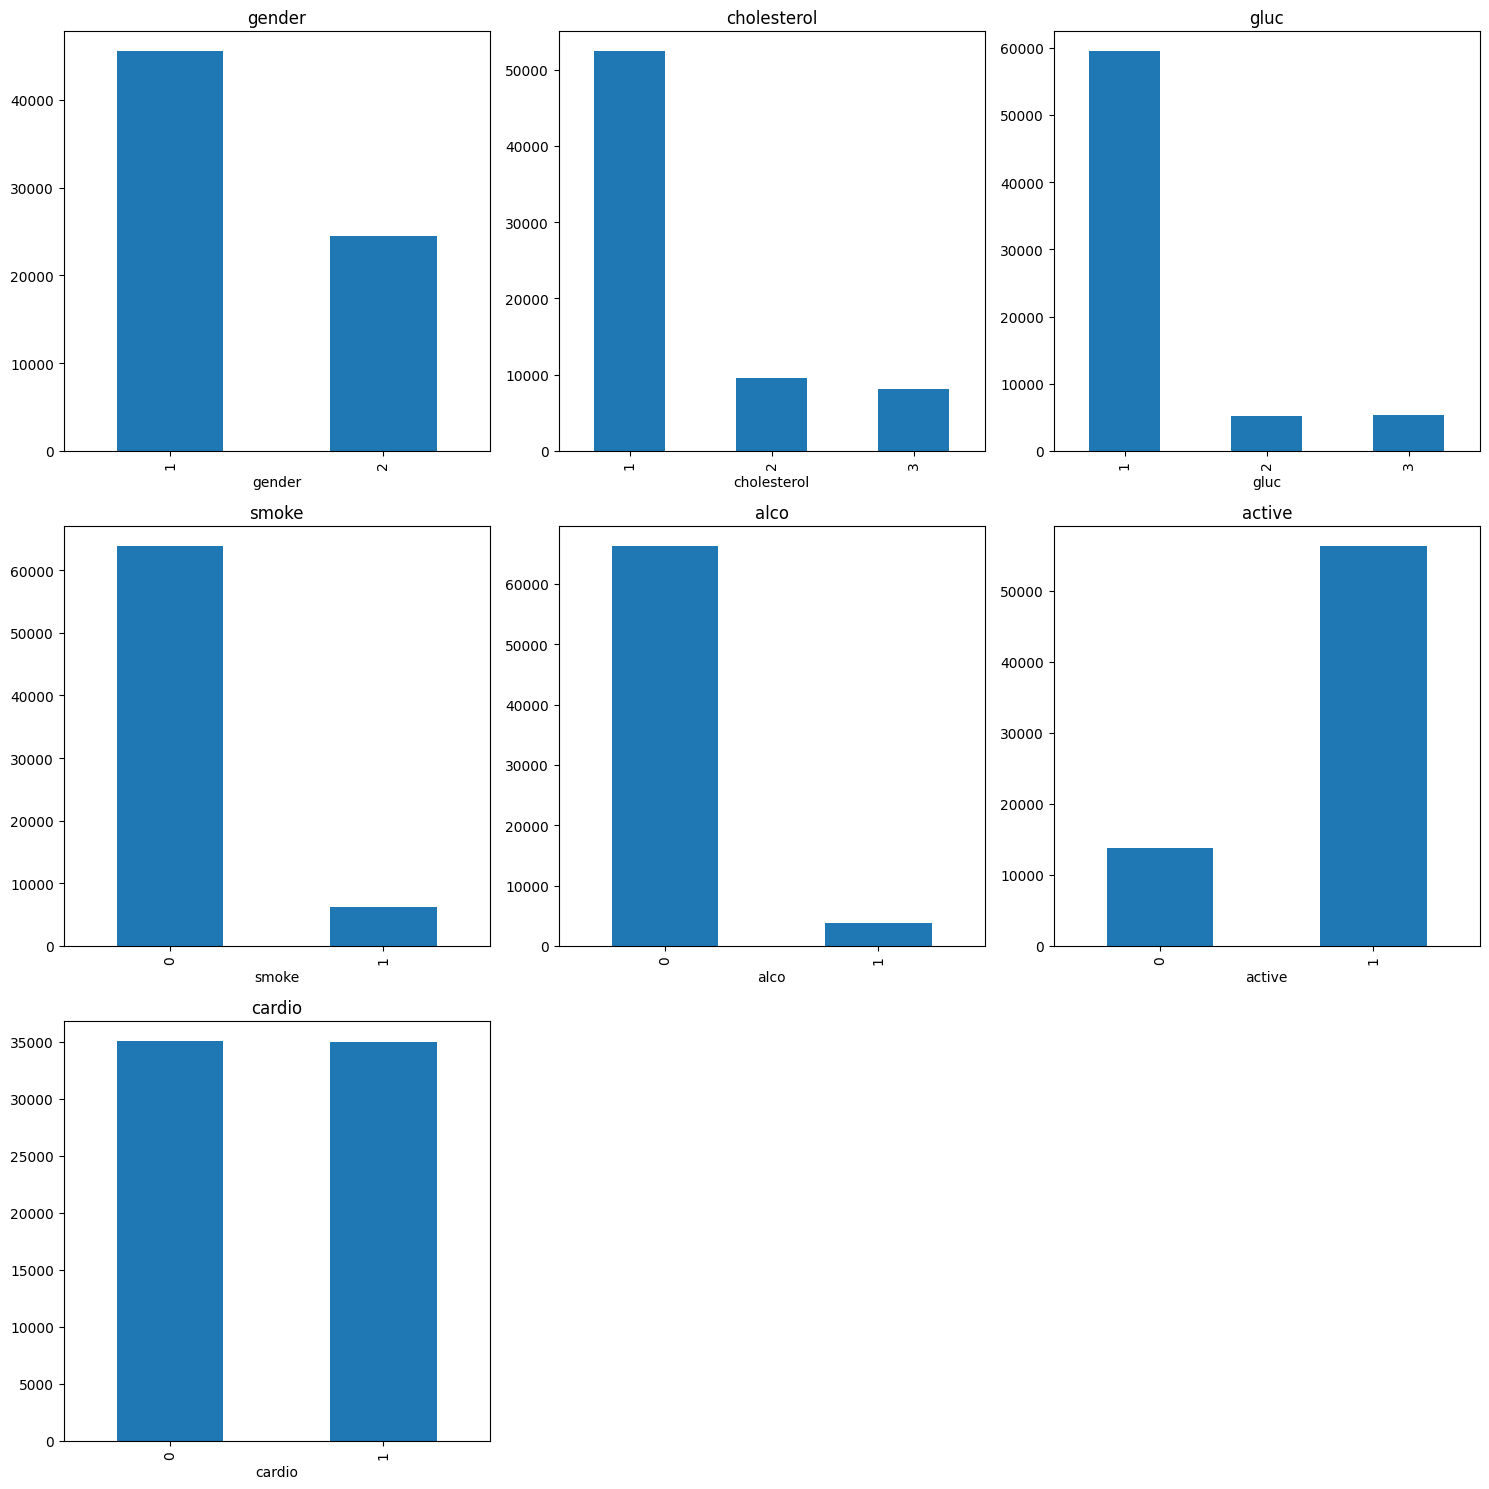

In [6]:
# Select categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Create bar plots for each categorical column
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for column, ax in zip(categorical_columns, axs.flatten()):
    data[column].value_counts().sort_index().plot(kind='bar', ax=ax, title=column)

# Remove unused subplots
for ax in axs.flatten()[len(categorical_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

# Original data analysis - categorical variables

Gender: There are more individuals of gender 1 (female) than gender 2 (male).

Cholesterol: Most individuals have a normal cholesterol level (1), but a significant number have above normal (2) and well above normal (3) levels.

Glucose (gluc): Similar to cholesterol, most individuals have a normal glucose level (1), but a significant number have above normal (2) and well above normal (3) levels.

Smoke: The majority of individuals in the dataset are non-smokers.

Alcohol (alco): The majority of individuals in the dataset do not consume alcohol.

Physical Activity (active): Most individuals in the dataset are physically active.

Cardiovascular Disease (cardio): The dataset is fairly balanced in terms of individuals with and without cardiovascular disease.

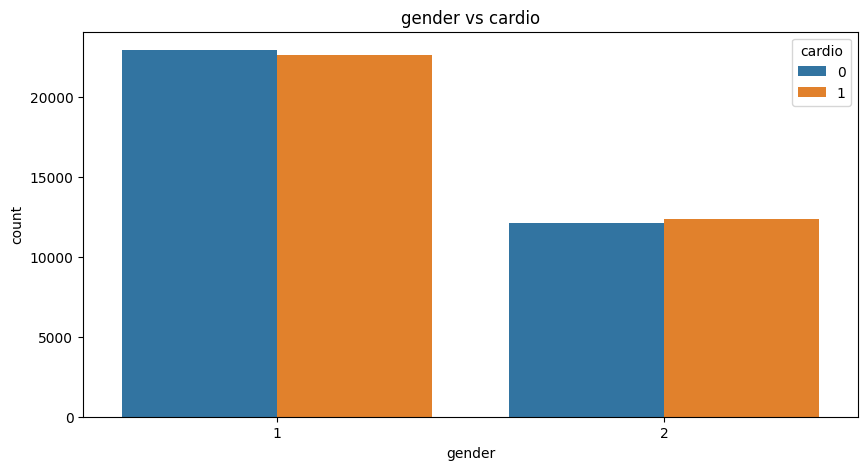

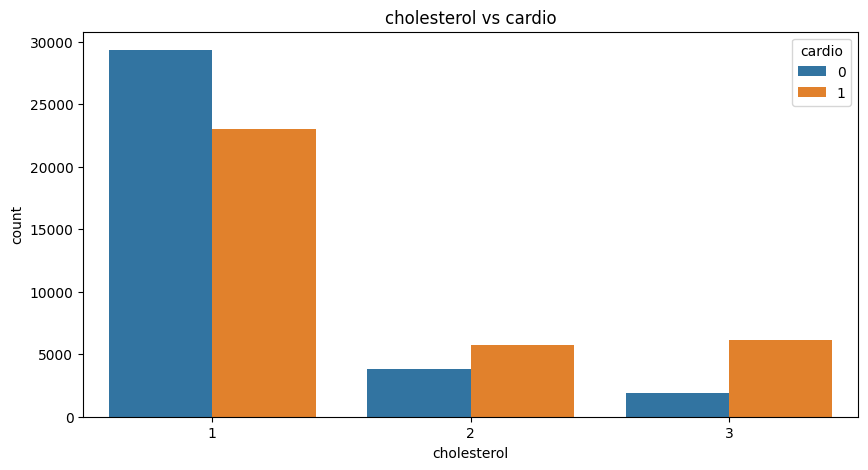

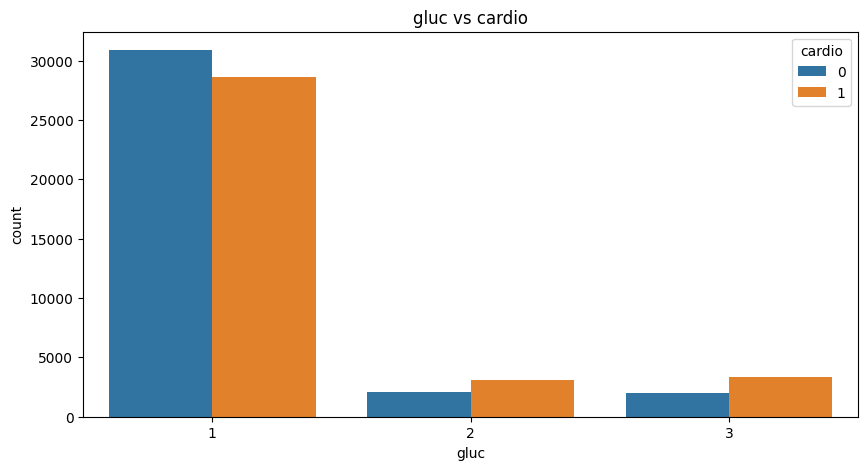

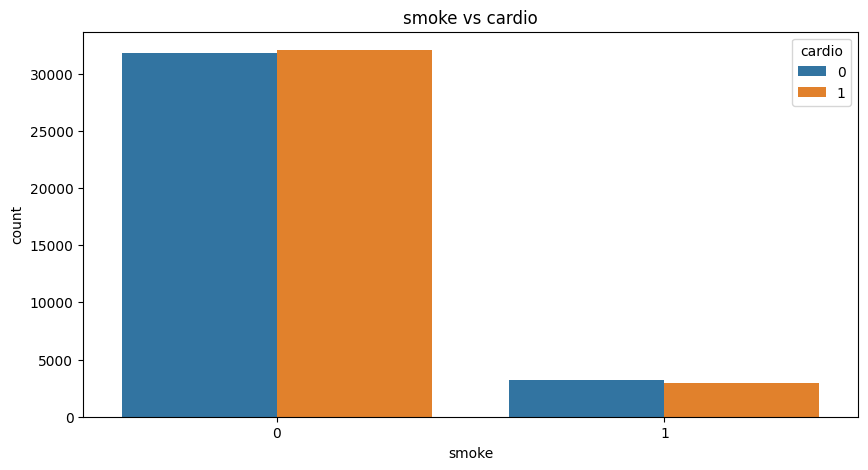

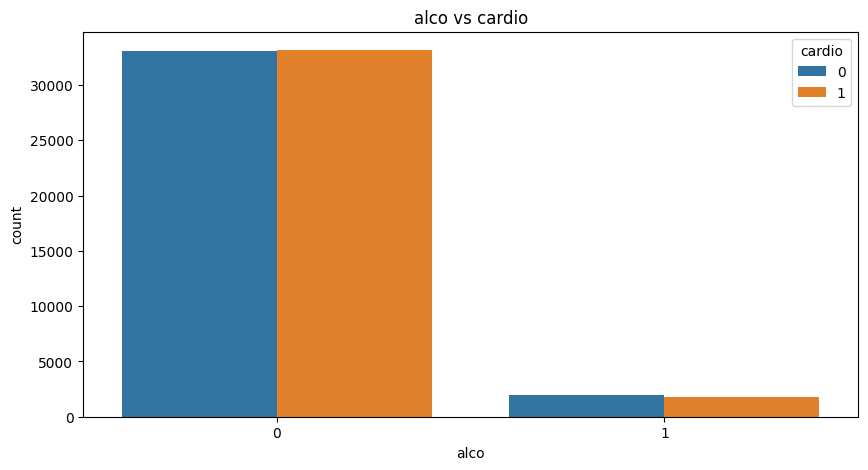

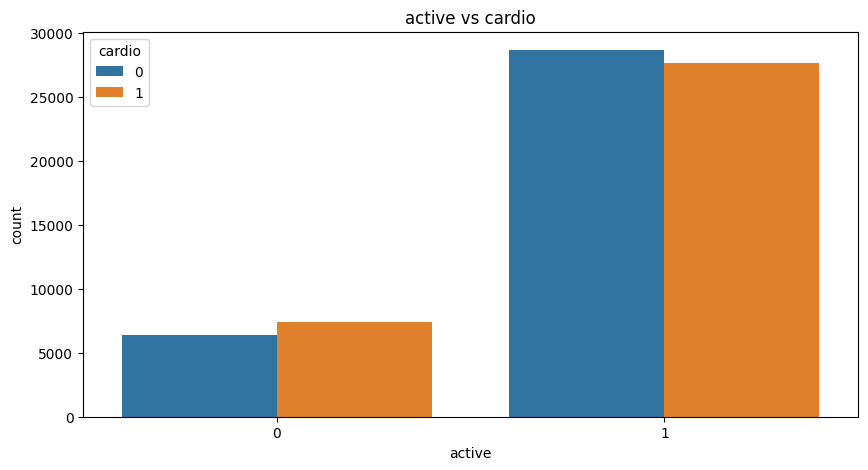

In [7]:
# List of categorical variables
cat_cols =['gender','cholesterol','gluc','smoke', 'alco','active']

# Plot countplots of categorical columns against the target variable
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='cardio', data= data)
    plt.title(f'{col} vs cardio')
    plt.show()

# Original categorical data vs. cardio(target variable)

Gender: There doesn't appear to be a significant difference in the prevalence of cardiovascular disease between the two genders.

Cholesterol: Individuals with above normal (2) and well above normal (3) cholesterol levels seem to have a higher prevalence of cardiovascular disease than those with normal levels (1).

Glucose (gluc): Similar to cholesterol, individuals with above normal (2) and well above normal (3) glucose levels seem to have a higher prevalence of cardiovascular disease than those with normal levels (1).

Smoke: There doesn't seem to be a significant difference in the prevalence of cardiovascular disease between smokers and non-smokers.

Alcohol (alco): There doesn't seem to be a significant difference in the prevalence of cardiovascular disease between those who consume alcohol and those who do not.

Physical Activity (active): Individuals who are not physically active seem to have a slightly higher prevalence of cardiovascular disease than those who are active.

These observations suggest that cholesterol and glucose levels may be associated with the prevalence of cardiovascular disease, while the other factors (gender, smoking status, alcohol consumption, and physical activity level) do not appear to have a strong association with the disease in this dataset.

In [9]:
# Since weight is a important factor for cardio, we create BMI to measure
# Create a BMI column
data['bmi'] = data['weight'] / (data['height'] / 100) ** 2

In [10]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


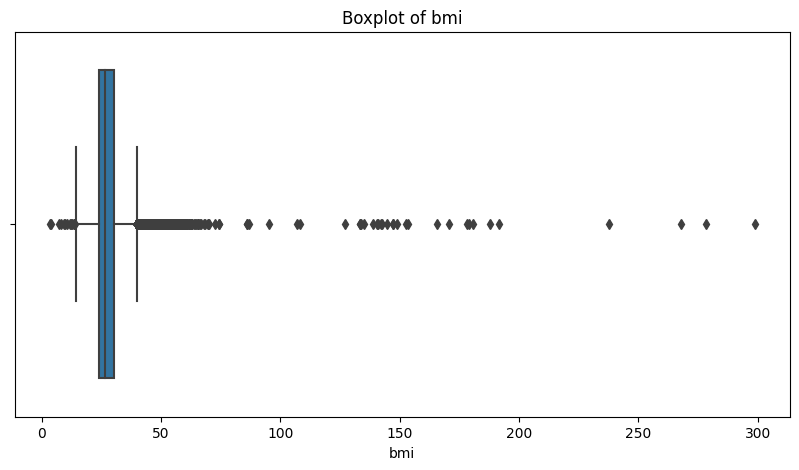

In [11]:
# Plot a boxplot for 'bmi'
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['bmi'])
plt.title('Boxplot of bmi')
plt.show()

## Data Cleaning - outliers

Age  range: 40 - 65


Height range : 100 cm - 220 cm 
Height has a minimum of 55 cm and a maximum of 250 cm. Heights below 100 cm or above 220 cm could be considered as outliers since these are quite uncommon values for adult human heights.

Wieght : 40kg  - 150kg 
weight has a minimum of 10 kg and a maximum of 200 kg. Weights below 40 kg or above 150 kg could be considered as outliers since these are quite uncommon values for adult human weights.

ap_hi and ap_lo : ap_hi 70 - 190 ; ap_lo 40 - 120 
contain some unrealistic values that we need to handle. Let's address these outliers next. We will consider systolic values (ap_hi) below 70 and above 190, and diastolic values (ap_lo) below 40 and above 120 as outliers and remove them from the dataset. These thresholds are set based on medical knowledge about typical blood pressure values.
reason to remove: they are likely to be errors and don't represent typical human blood pressure values.

BMI: 15 - 40. A BMI below 15 or above 40 is quite uncommon. A BMI below 15 is considered very severely underweight, while a BMI above 40 is considered very severely obese.

In [13]:
# Compute the IQR for 'age'
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define the boundaries for outliers
lower_bound = Q1_age - 1.5 * IQR_age
upper_bound = Q3_age + 1.5 * IQR_age

# Identify the outliers
outliers_age = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

# Display the outliers
outliers_age


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
6219,8850,30,1,175,59.0,120,80,1,1,0,0,1,0,19.265306
22343,31922,30,2,175,92.0,100,60,1,1,0,0,1,0,30.040816
30666,43842,30,1,159,59.0,120,80,1,1,0,0,1,0,23.337684
55905,79749,30,1,160,59.0,110,70,1,1,0,0,1,0,23.046875


In [15]:
# Copy the original dataset
data_copy = data.copy()

# Define the thresholds
height_thresholds = [100, 220]
weight_thresholds = [40, 150]
ap_hi_thresholds = [70, 190]
ap_lo_thresholds = [40, 120]
bmi_thresholds = [15, 40]

# Calculate the number of outliers for each variable
height_outliers = data_copy[(data_copy['height'] < height_thresholds[0]) | (data_copy['height'] > height_thresholds[1])].shape[0]
weight_outliers = data_copy[(data_copy['weight'] < weight_thresholds[0]) | (data_copy['weight'] > weight_thresholds[1])].shape[0]
ap_hi_outliers = data_copy[(data_copy['ap_hi'] < ap_hi_thresholds[0]) | (data_copy['ap_hi'] > ap_hi_thresholds[1])].shape[0]
ap_lo_outliers = data_copy[(data_copy['ap_lo'] < ap_lo_thresholds[0]) | (data_copy['ap_lo'] > ap_lo_thresholds[1])].shape[0]
bmi_outliers = data_copy[(data_copy['bmi'] < bmi_thresholds[0]) | (data_copy['bmi'] > bmi_thresholds[1])].shape[0]

# Print the number of outliers for each variable
height_outliers, weight_outliers, ap_hi_outliers, ap_lo_outliers, bmi_outliers


(30, 111, 409, 1115, 1899)

In [16]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [17]:
# Remove age outliers
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Remove height outliers
data = data[(data['height'] >= 100) & (data['height'] <= 220)]

# Remove weight outliers
data = data[(data['weight'] >= 40) & (data['weight'] <= 150)]

# Remove blood pressure outliers
data = data[(data['ap_hi'] >= 70) & (data['ap_hi'] <= 190)]
data = data[(data['ap_lo'] >= 40) & (data['ap_lo'] <= 120)]

# Remove BMI outliers
data = data[(data['bmi'] >= 15) & (data['bmi'] <= 40)]

# Show the all rows of  cleaned data
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


The data is cleaned now.

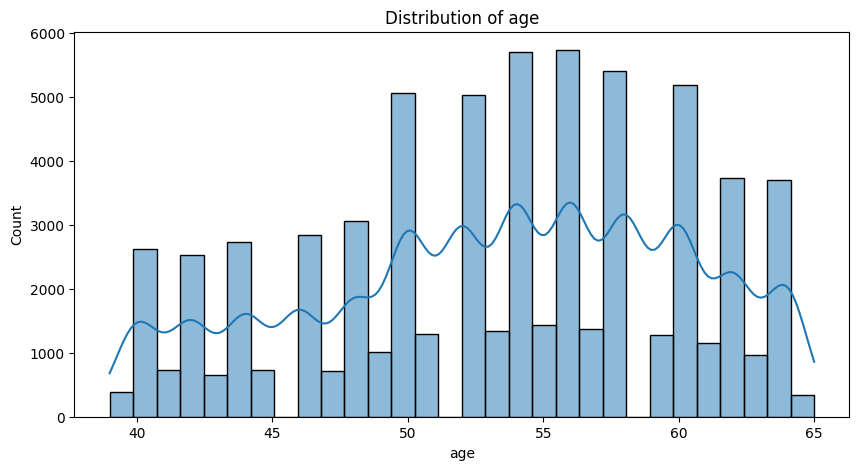

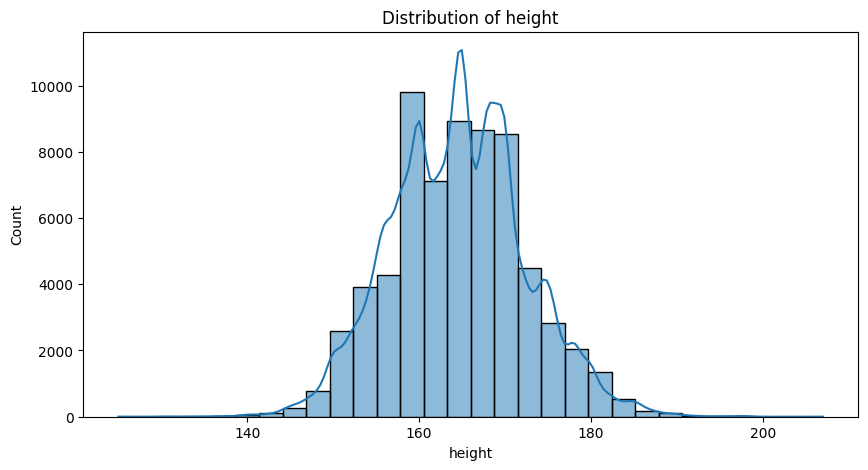

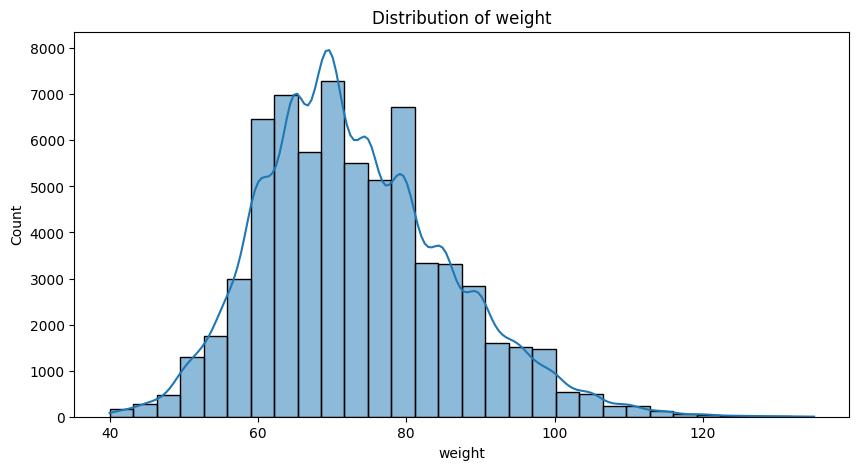

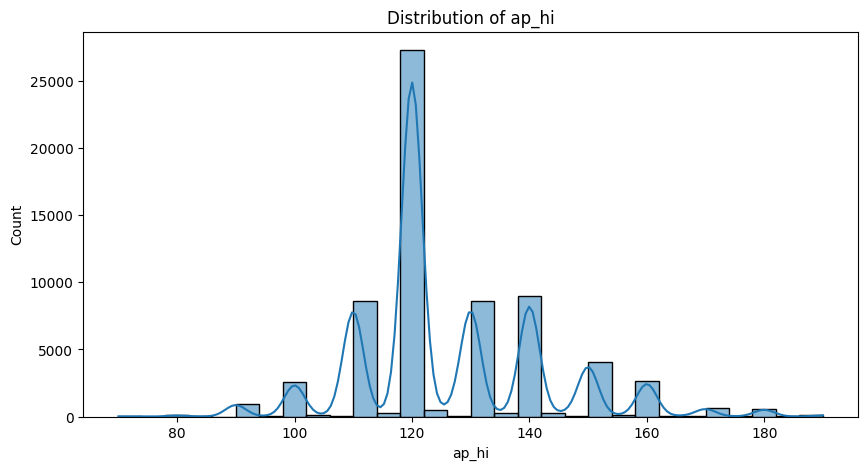

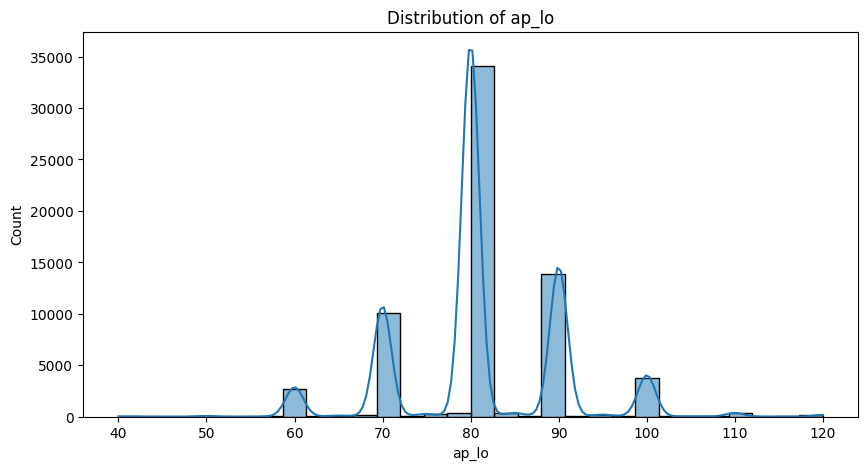

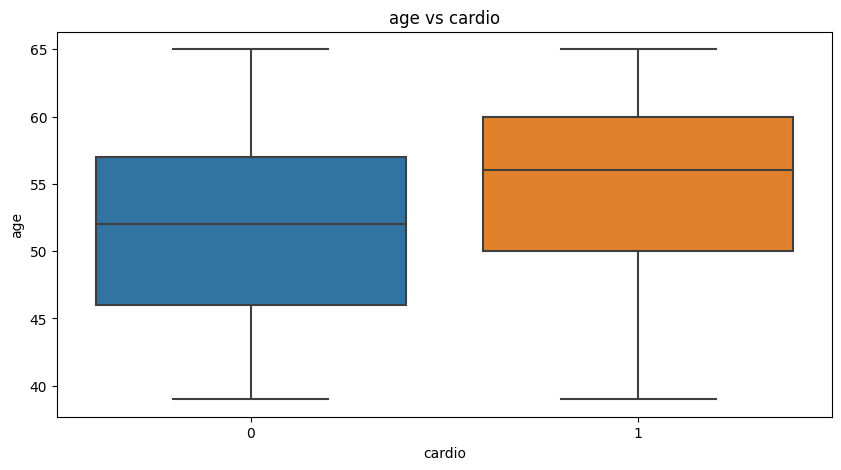

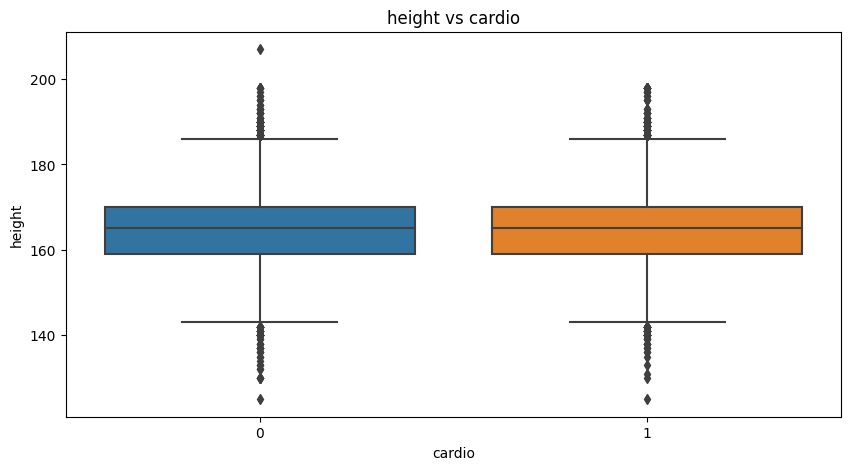

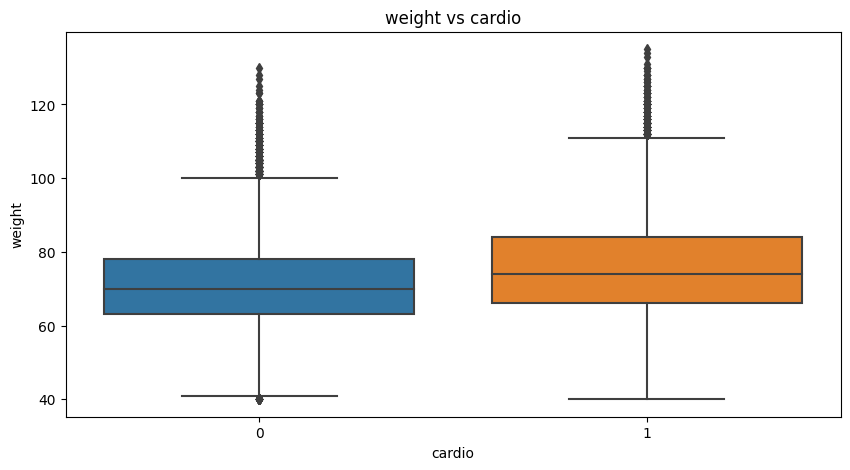

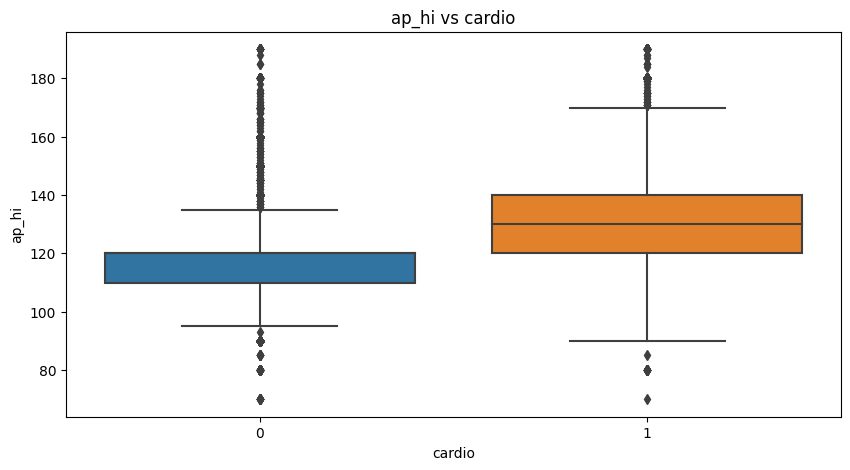

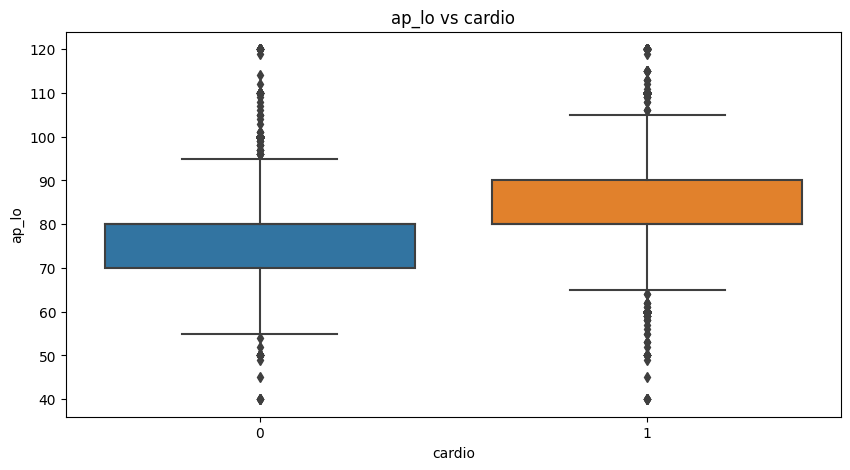

In [18]:
# Plot  new histograms for numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Plot new boxplots of numerical columns against the target variable
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='cardio', y=col, data=data)
    plt.title(f'{col} vs cardio')
    plt.show()

In [34]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000,66705.000000
mean,49958.009789,53.300037,1.354201,164.569687,73.134506,126.194243,81.122899,1.356705,1.220403,0.088839,0.053279,0.804078,0.488959,27.016038
std,28864.285520,6.772576,0.478274,7.790880,12.762491,16.159698,9.249402,0.672692,0.566273,0.284513,0.224592,0.396912,0.499882,4.452142
min,0.000000,39.000000,1.000000,125.000000,40.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.035584
25%,24955.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.828125
50%,50001.000000,54.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.196187
75%,74876.000000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.752744
max,99999.000000,65.000000,2.000000,207.000000,135.000000,190.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,40.000000


In the data cleaning process, we removed certain outliers and observations that were below the first quartile for the 'age' variable. The impact of this cleaning process on the dataset can be observed in the changes to the mean values of several variables.

- Age: The average age saw a minor decrease from 53.3387 years to 53.3000 years. This small change suggests that the removed outliers had ages close to the overall average.
  
- Height: The average height had a slight increase from 164.3592 cm to 164.5697 cm. This change is not significant and suggests that the data cleaning did not heavily impact this variable.
  
- Weight: The average weight decreased from 74.2057 kg to 73.1345 kg. This indicates that some of the removed outliers or observations had weights above the average.
  
- Ap_hi: The average systolic blood pressure ('ap_hi') decreased from 128.8173 to 126.1942. This suggests that the removed observations had higher systolic blood pressure compared to the average.
  
- Ap_lo: The average diastolic blood pressure ('ap_lo') showed a significant decrease from 96.6304 to 81.1229. This large decrease indicates that the removed outliers had considerably higher diastolic blood pressure than the average.
  
- BMI: The average Body Mass Index (BMI) decreased from 27.5565 to 27.0160. This change suggests that some of the removed outliers or observations were above the average BMI.

These changes in the means of the variables provide valuable insights into the characteristics of the outliers and observations that were removed during the data cleaning process.

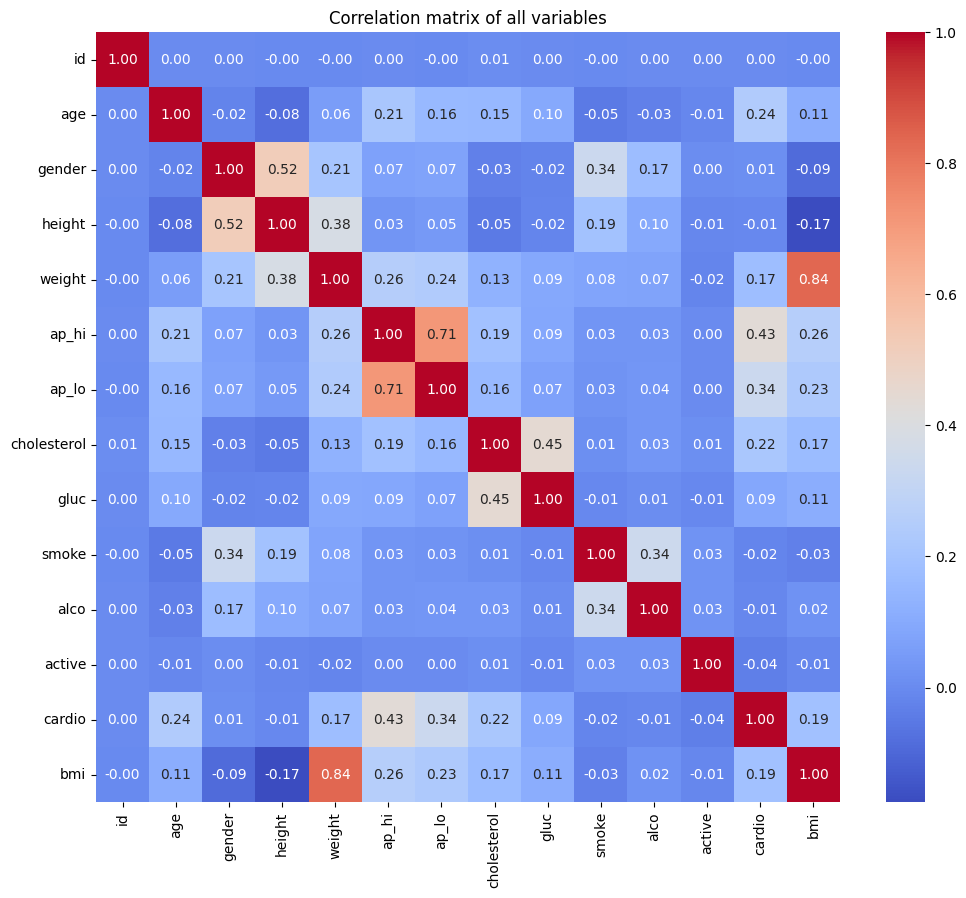

In [35]:
# Calculate correlation matrix
corr = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation matrix of all variables')
plt.show()

Now, 

age(0.24), weight(0.17), ap_hi(0.43), ap_lo(0.34),cholesterol(0.22) and bmi (0.19) show a moderate positive correlation with the presence of cardiovascular disease (cardio).
age and cardio: There is a positive correlation coefficient (0.24), indicating that the risk of cardiovascular disease tends to increase with age.
weight and ap_hi/ap_lo: There is a positive correlation between weight and both systolic (0.26) and diastolic (0.24) blood pressure. This suggests that higher weight may be associated with higher blood pressure.
cholesterol and cardio: There is a moderate positive correlation (0.22), suggesting that high cholesterol levels could be a risk factor for cardiovascular disease.
ap_hi and cardio: There is a moderate positive correlation (0.43), indicating that higher systolic blood pressure is associated with a higher risk of cardiovascular disease.
ap_lo and cardio: There is also a moderate positive correlation (0.34), indicating that higher diastolic blood pressure is associated with a higher risk of cardiovascular disease.
BMI and cardio: There is a positive coefficient(0.19),indicating that higher BMI is associated with a higher risk of cardiovascular disease.
Also this corresponds to our hypothesis that age, blood pressure and cholesterol level are indeed the three most influential factors

active lifestyle shows a slight negative correlation with cardio, indicating that active individuals have a slightly lower chance of having cardiovascular disease.


gender doesn't seem to have a significant correlation with cardio.

ap_hi and ap_lo are reasonably correlated with each other, which is expected as they both pertain to blood pressure.

cholesterol and gluc(0.09) are also somewhat correlated. This is not surprising, as these two can be related in terms of diet and lifestyle.